# IPL Score Prediction using Machine Learning

This Machine Learning model adapts a Regression Approach to predict the score of the First Inning of an IPL Match.

# Import Necessary Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np


Load the dataset

In [3]:
#Importing dataset
df = pd.read_csv("/content/ipl_data.csv")


# Exploratory Data Analysis

In [4]:
# First 5 Columns Data
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [5]:
# Describing the dataset
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,51114.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000,51113.000000
mean,207.440232,73.345274,2.452879,9.772549,32.532330,1.127991,24.448614,8.610960,157.894547
std,119.504107,47.926399,2.030315,5.770861,14.692419,1.054423,19.911014,10.417489,29.247175
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,104.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,139.000000
50%,207.000000,69.000000,2.000000,9.600000,33.000000,1.000000,20.000000,5.000000,159.000000
75%,311.000000,108.000000,4.000000,14.600000,42.000000,2.000000,35.000000,12.000000,178.000000
max,415.000000,263.000000,10.000000,19.600000,94.000000,7.000000,175.000000,82.000000,263.000000


In [6]:
# Information about Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51114 entries, 0 to 51113
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             51114 non-null  int64  
 1   date            51114 non-null  object 
 2   venue           51114 non-null  object 
 3   bat_team        51114 non-null  object 
 4   bowl_team       51113 non-null  object 
 5   batsman         51113 non-null  object 
 6   bowler          51113 non-null  object 
 7   runs            51113 non-null  float64
 8   wickets         51113 non-null  float64
 9   overs           51113 non-null  float64
 10  runs_last_5     51113 non-null  float64
 11  wickets_last_5  51113 non-null  float64
 12  striker         51113 non-null  float64
 13  non-striker     51113 non-null  float64
 14  total           51113 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 5.8+ MB


In [7]:
# Number of Unique Values in each column
df.nunique()

mid               415
date              291
venue              31
bat_team           11
bowl_team          11
batsman           325
bowler            262
runs              248
wickets            11
overs             140
runs_last_5        94
wickets_last_5      8
striker           150
non-striker        80
total             121
dtype: int64

In [8]:
# df types of all Columns
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs              float64
wickets           float64
overs             float64
runs_last_5       float64
wickets_last_5    float64
striker           float64
non-striker       float64
total             float64
dtype: object

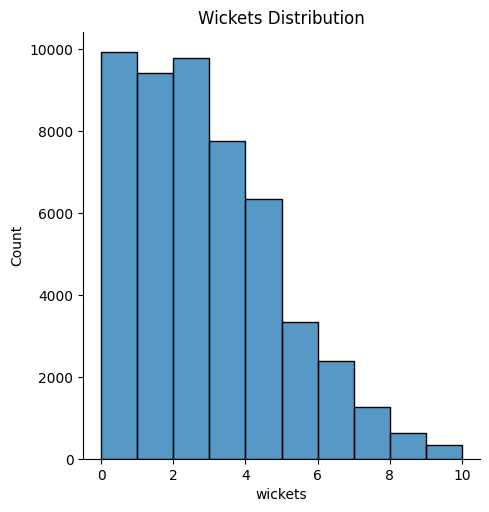

In [10]:
#Wickets Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

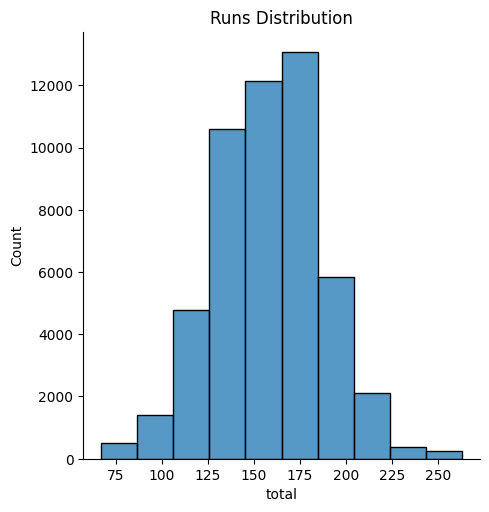

In [11]:
#Runs Distribution
sns.displot(df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

#### Removing Irrelevant Data colunms

In [12]:
# Names of all columns
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [13]:
irrelevant_columns = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

# Remove irrelevant columns from the DataFrame
df.drop(irrelevant_columns, axis=1, inplace=True)
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


#### Keeping only Consistent Teams


In [15]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
df = df[(df['bat_team'].isin(const_teams)) & (df['bowl_team'].isin(const_teams))]
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


#### Remove First 5 Overs of every match

In [17]:
ipl_df = df[df['overs'] >= 5.0]
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


Plotting a Correlation Matrix of current data

<ipython-input-18-e300a4a3cf3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=df.corr(), annot=True)


<Axes: >

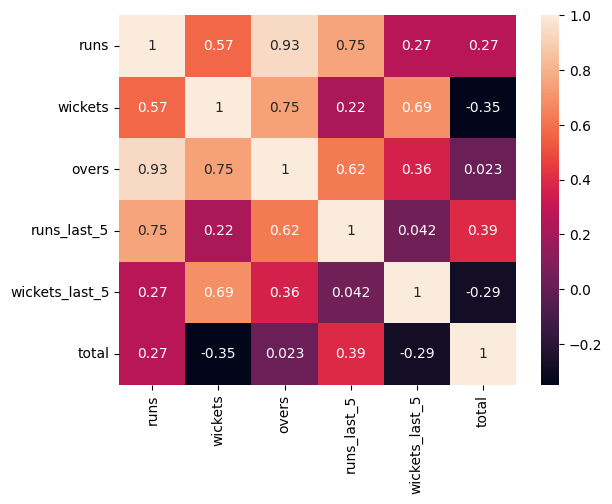

In [18]:
from seaborn import heatmap
heatmap(data=df.corr(), annot=True)

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [19]:
# label encoding is uesd to converting the categorical team names into numerical representations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  df[col] = le.fit_transform(df[col])
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,3,6,1.0,0.0,0.1,1.0,0.0,222.0
1,3,6,1.0,0.0,0.2,1.0,0.0,222.0
2,3,6,2.0,0.0,0.2,2.0,0.0,222.0
3,3,6,2.0,0.0,0.3,2.0,0.0,222.0
4,3,6,2.0,0.0,0.4,2.0,0.0,222.0


#### Performing One Hot Encoding and Column Transformation

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creating a ColumnTransformer instance
columnTransformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [0, 1])
    ],
    remainder='passthrough'
)

In [21]:
df = np.array(columnTransformer.fit_transform(ipl_df))

Save the Numpy Array in a new DataFrame with transformed columns

In [22]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df1 = pd.DataFrame(df, columns=cols)

In [23]:
# Encoded Data
df1.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Prepare Train and Test Data

In [24]:
features = df1.drop(['total'], axis=1)
labels = df1['total']

In [25]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)

## ML  Algorithms

In [26]:
models = dict()

#### 1. Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [28]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 86.93%


#### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [30]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 67.10%
Test Score : 67.19%


#### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [32]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.20%
Test Score : 94.26%


<BarContainer object of 3 artists>

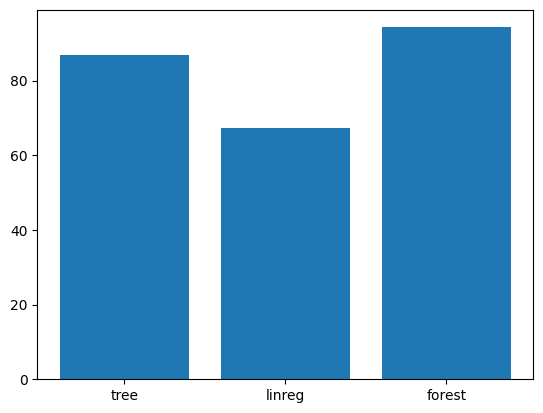

In [33]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **LINEAR REGRESSOR**. So we will be choosing Random Forest for the final model

# Predictions

In [34]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [35]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 140 || Actual Score : 147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [36]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 182 || Actual Score : 176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [37]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 172 || Actual Score : 172


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [38]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 103 || Actual Score : 110


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [39]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 147 || Actual Score : 153


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [40]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))